In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:
train_dir ='/content/drive/MyDrive/Yoga Dataset 1/TRAIN/' 
test_dir = '/content/drive/MyDrive/Yoga Dataset 1/TEST/'

In [ ]:
row=224
col=224
classes = 5

In [ ]:
def count_poses(path,set_):
    dict_={}
    print(os. getcwd())
    os. chdir(path)
    for poses in os.listdir(path):
        dir_ = path + poses
        dict_[poses]=len(os.listdir(dir_))

    df = pd.DataFrame(dict_,index=[set_])
    return df

In [ ]:
train_count=count_poses(train_dir,'train_count')
print(train_count)

/content
             goddess  downdog  tree  plank  warrior2
train_count      180      223   165    266       252


In [ ]:
test_count=count_poses(test_dir,'test')
print(test_count)

/content/drive/MyDrive/Yoga Dataset 1/TRAIN
      warrior2  goddess  downdog  plank  tree
test       112       82       97    115    78


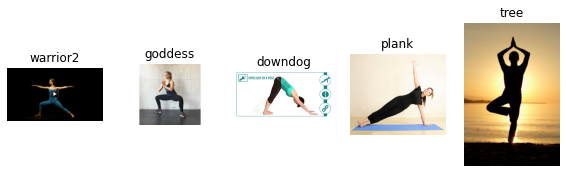

In [ ]:
plt.figure(figsize=(14,22))
i = 1
for poses in os.listdir(test_dir):
    img = keras.preprocessing.image.load_img((train_dir + poses +'/'+ os.listdir(train_dir + poses)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(poses)
    plt.axis('off')
    i += 1
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,Dense, MaxPooling2D,Flatten,Dropout,Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger,TensorBoard,EarlyStopping,ReduceLROnPlateau
import datetime
from tensorflow.keras.utils import plot_model

In [ ]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [ ]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 870 images belonging to 5 classes.
Found 95 images belonging to 5 classes.


In [ ]:
train_generator.class_indices

{'downdog': 0, 'goddess': 1, 'plank': 2, 'tree': 3, 'warrior2': 4}

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
epochs = 50
batch_size = 16

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 128)       0

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)

Epoch 1/50
 3/55 [>.............................] - ETA: 6:09 - loss: 32.1766 - accuracy: 0.1875

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


55/55 [==============================] - 410s 7s/step - loss: 3.4104 - accuracy: 0.2046 - val_loss: 1.6039 - val_accuracy: 0.2421
Epoch 2/50
55/55 [==============================] - 376s 7s/step - loss: 1.6005 - accuracy: 0.2517 - val_loss: 1.5990 - val_accuracy: 0.2421
Epoch 3/50
55/55 [==============================] - 375s 7s/step - loss: 1.5966 - accuracy: 0.2471 - val_loss: 1.5963 - val_accuracy: 0.2421
Epoch 4/50
55/55 [==============================] - 369s 7s/step - loss: 1.5946 - accuracy: 0.2414 - val_loss: 1.5956 - val_accuracy: 0.2421
Epoch 5/50
55/55 [==============================] - 379s 7s/step - loss: 1.5965 - accuracy: 0.2609 - val_loss: 1.4900 - val_accuracy: 0.4737
Epoch 6/50
55/55 [==============================] - 377s 7s/step - loss: 1.5448 - accuracy: 0.3046 - val_loss: 1.4314 - val_accuracy: 0.5368
Epoch 7/50
55/55 [==============================] - 371s 7s/step - loss: 1.4637 - accuracy: 0.3701 - val_loss: 1.2492 - val_accuracy: 0.5368
Epoch 8/50
55/55 [======

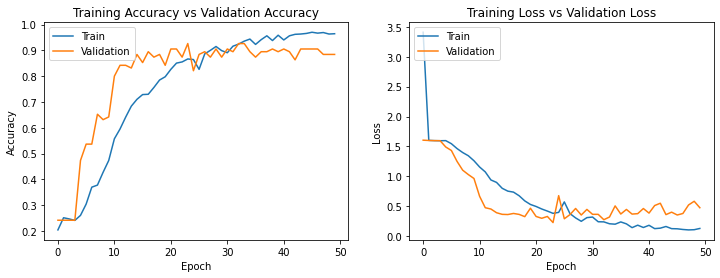

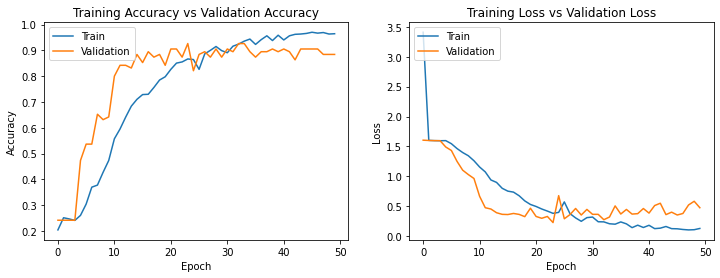

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

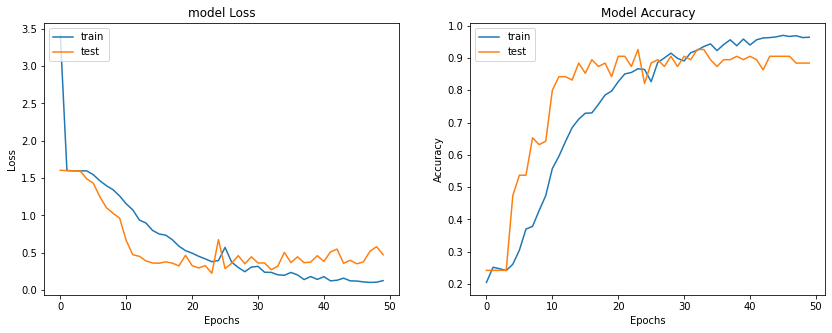

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

     downdog       0.16      0.16      0.16        19
     goddess       0.33      0.31      0.32        16
       plank       0.24      0.22      0.23        23
        tree       0.18      0.20      0.19        15
    warrior2       0.22      0.23      0.22        22

    accuracy                           0.22        95
   macro avg       0.22      0.22      0.22        95
weighted avg       0.22      0.22      0.22        95



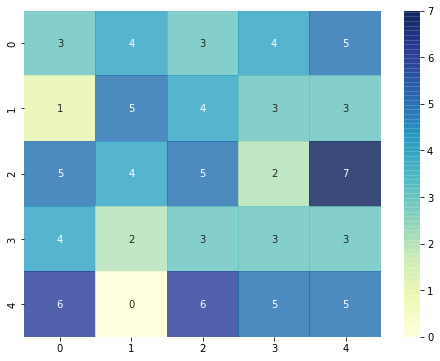

In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
predictions = model.predict_generator(validation_generator)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(confusion_matrix(true_classes, predicted_classes)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)